In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import trackintel as ti
import numpy as np
tpls = ti.io.file.read_triplegs_csv('food_related_trip.csv', columns={'trip_started_at':'started_at', 'trip_finished_at':'finished_at', 'trip':'geom'}, crs='EPSG:4326', index_col=0)
tpls

,user_id,started_at,finished_at,geom,stop_lat,stop_lon,retail_id,retail_lat,retail_lon
0,4,2022-09-05 16:37:54-04:00,2022-09-05 16:38:47-04:00,"LINESTRING (-81.41427 30.32450, -81.42640 30.3...",30.317045,-81.557200,98948,30.317965,-81.556488
1,4,2022-09-06 13:13:38-04:00,2022-09-06 13:15:57-04:00,"LINESTRING (-81.47553 30.31958, -81.49536 30.3...",30.320775,-81.489335,217378,30.321608,-81.489418
2,4,2022-09-08 22:39:14-04:00,2022-09-08 22:40:42-04:00,"LINESTRING (-81.49553 30.33010, -81.48984 30.3...",30.322875,-81.489600,217378,30.321608,-81.489418
3,4,2022-09-09 13:13:30-04:00,2022-09-09 13:15:57-04:00,"LINESTRING (-81.47554 30.31957, -81.47553 30.3...",30.320775,-81.489347,217378,30.321608,-81.489418
4,4,2022-09-09 13:13:30-04:00,2022-09-09 13:15:57-04:00,"LINESTRING (-81.47554 30.31957, -81.47553 30.3...",30.319298,-81.474303,4324,30.318197,-81.473534
...,...,...,...,...,...,...,...,...,...
8390,12311,2022-10-31 10:52:35-04:00,2022-10-31 10:53:13-04:00,"LINESTRING (-81.59063 30.35954, -81.58973 30.3...",30.351942,-81.589150,87300,30.352303,-81.589569
8391,12311,2022-10-31 21:37:12-04:00,2022-10-31 21:42:07-04:00,"LINESTRING (-81.52175 30.29366, -81.52338 30.3...",30.352328,-81.565397,122498,30.352171,-81.566986
8392,12366,2022-10-28 17:45:58-04:00,2022-10-28 17:47:07-04:00,"LINESTRING (-81.69912 30.40503, -81.70822 30.4...",30.391939,-81.730192,14499,30.391975,-81.730347
8393,12368,2022-10-24 19:14:27-04:00,2022-10-24 19:16:49-04:00,"LINESTRING (-81.57286 30.17251, -81.57381 30.1...",30.171608,-81.602115,119832,30.172998,-81.602806


In [2]:
# Predict the transport mode of triplegs.
"""simple-coarse method includes {'slow_mobility', 'motorized_mobility', 'fast_mobility'}. 
In the default classification, slow_mobility (<15 km/h) includes transport modes such as walking or cycling, 
motorized_mobility (<100 km/h) modes such as car or train, 
and fast_mobility (>100 km/h) modes such as high-speed rail or airplanes."""
categories = {
    15/3.6: 'slow_mobility',  # walking or cycling
    193/3.6: 'motorized_mobility',  # car
    np.inf: 'fast_mobility'  # high-speed rail or airplane
}
mode_tpls  = tpls.as_triplegs.predict_transport_mode(categories = categories)
mode_tpls

/usr/local/lib/python3.9/site-packages/pygeos/io.py:89: UserWarning: The shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the PyGEOS GEOS version (3.10.4-CAPI-1.16.2). Conversions between both will be slow
  warnings.warn(


,user_id,started_at,finished_at,geom,stop_lat,stop_lon,retail_id,retail_lat,retail_lon,mode
0,4,2022-09-05 16:37:54-04:00,2022-09-05 16:38:47-04:00,"LINESTRING (-81.41427 30.32450, -81.42640 30.3...",30.317045,-81.557200,98948,30.317965,-81.556488,motorized_mobility
1,4,2022-09-06 13:13:38-04:00,2022-09-06 13:15:57-04:00,"LINESTRING (-81.47553 30.31958, -81.49536 30.3...",30.320775,-81.489335,217378,30.321608,-81.489418,motorized_mobility
2,4,2022-09-08 22:39:14-04:00,2022-09-08 22:40:42-04:00,"LINESTRING (-81.49553 30.33010, -81.48984 30.3...",30.322875,-81.489600,217378,30.321608,-81.489418,motorized_mobility
3,4,2022-09-09 13:13:30-04:00,2022-09-09 13:15:57-04:00,"LINESTRING (-81.47554 30.31957, -81.47553 30.3...",30.320775,-81.489347,217378,30.321608,-81.489418,motorized_mobility
4,4,2022-09-09 13:13:30-04:00,2022-09-09 13:15:57-04:00,"LINESTRING (-81.47554 30.31957, -81.47553 30.3...",30.319298,-81.474303,4324,30.318197,-81.473534,motorized_mobility
...,...,...,...,...,...,...,...,...,...,...
8390,12311,2022-10-31 10:52:35-04:00,2022-10-31 10:53:13-04:00,"LINESTRING (-81.59063 30.35954, -81.58973 30.3...",30.351942,-81.589150,87300,30.352303,-81.589569,motorized_mobility
8391,12311,2022-10-31 21:37:12-04:00,2022-10-31 21:42:07-04:00,"LINESTRING (-81.52175 30.29366, -81.52338 30.3...",30.352328,-81.565397,122498,30.352171,-81.566986,motorized_mobility
8392,12366,2022-10-28 17:45:58-04:00,2022-10-28 17:47:07-04:00,"LINESTRING (-81.69912 30.40503, -81.70822 30.4...",30.391939,-81.730192,14499,30.391975,-81.730347,motorized_mobility
8393,12368,2022-10-24 19:14:27-04:00,2022-10-24 19:16:49-04:00,"LINESTRING (-81.57286 30.17251, -81.57381 30.1...",30.171608,-81.602115,119832,30.172998,-81.602806,motorized_mobility


In [3]:
mode_split = ti.analysis.modal_split.calculate_modal_split(tpls = mode_tpls, metric='count', freq='D', per_user=False)

(<Figure size 4110.24x2540.27 with 1 Axes>,
 <Axes: xlabel='days', ylabel='Percentage of daily count'>)

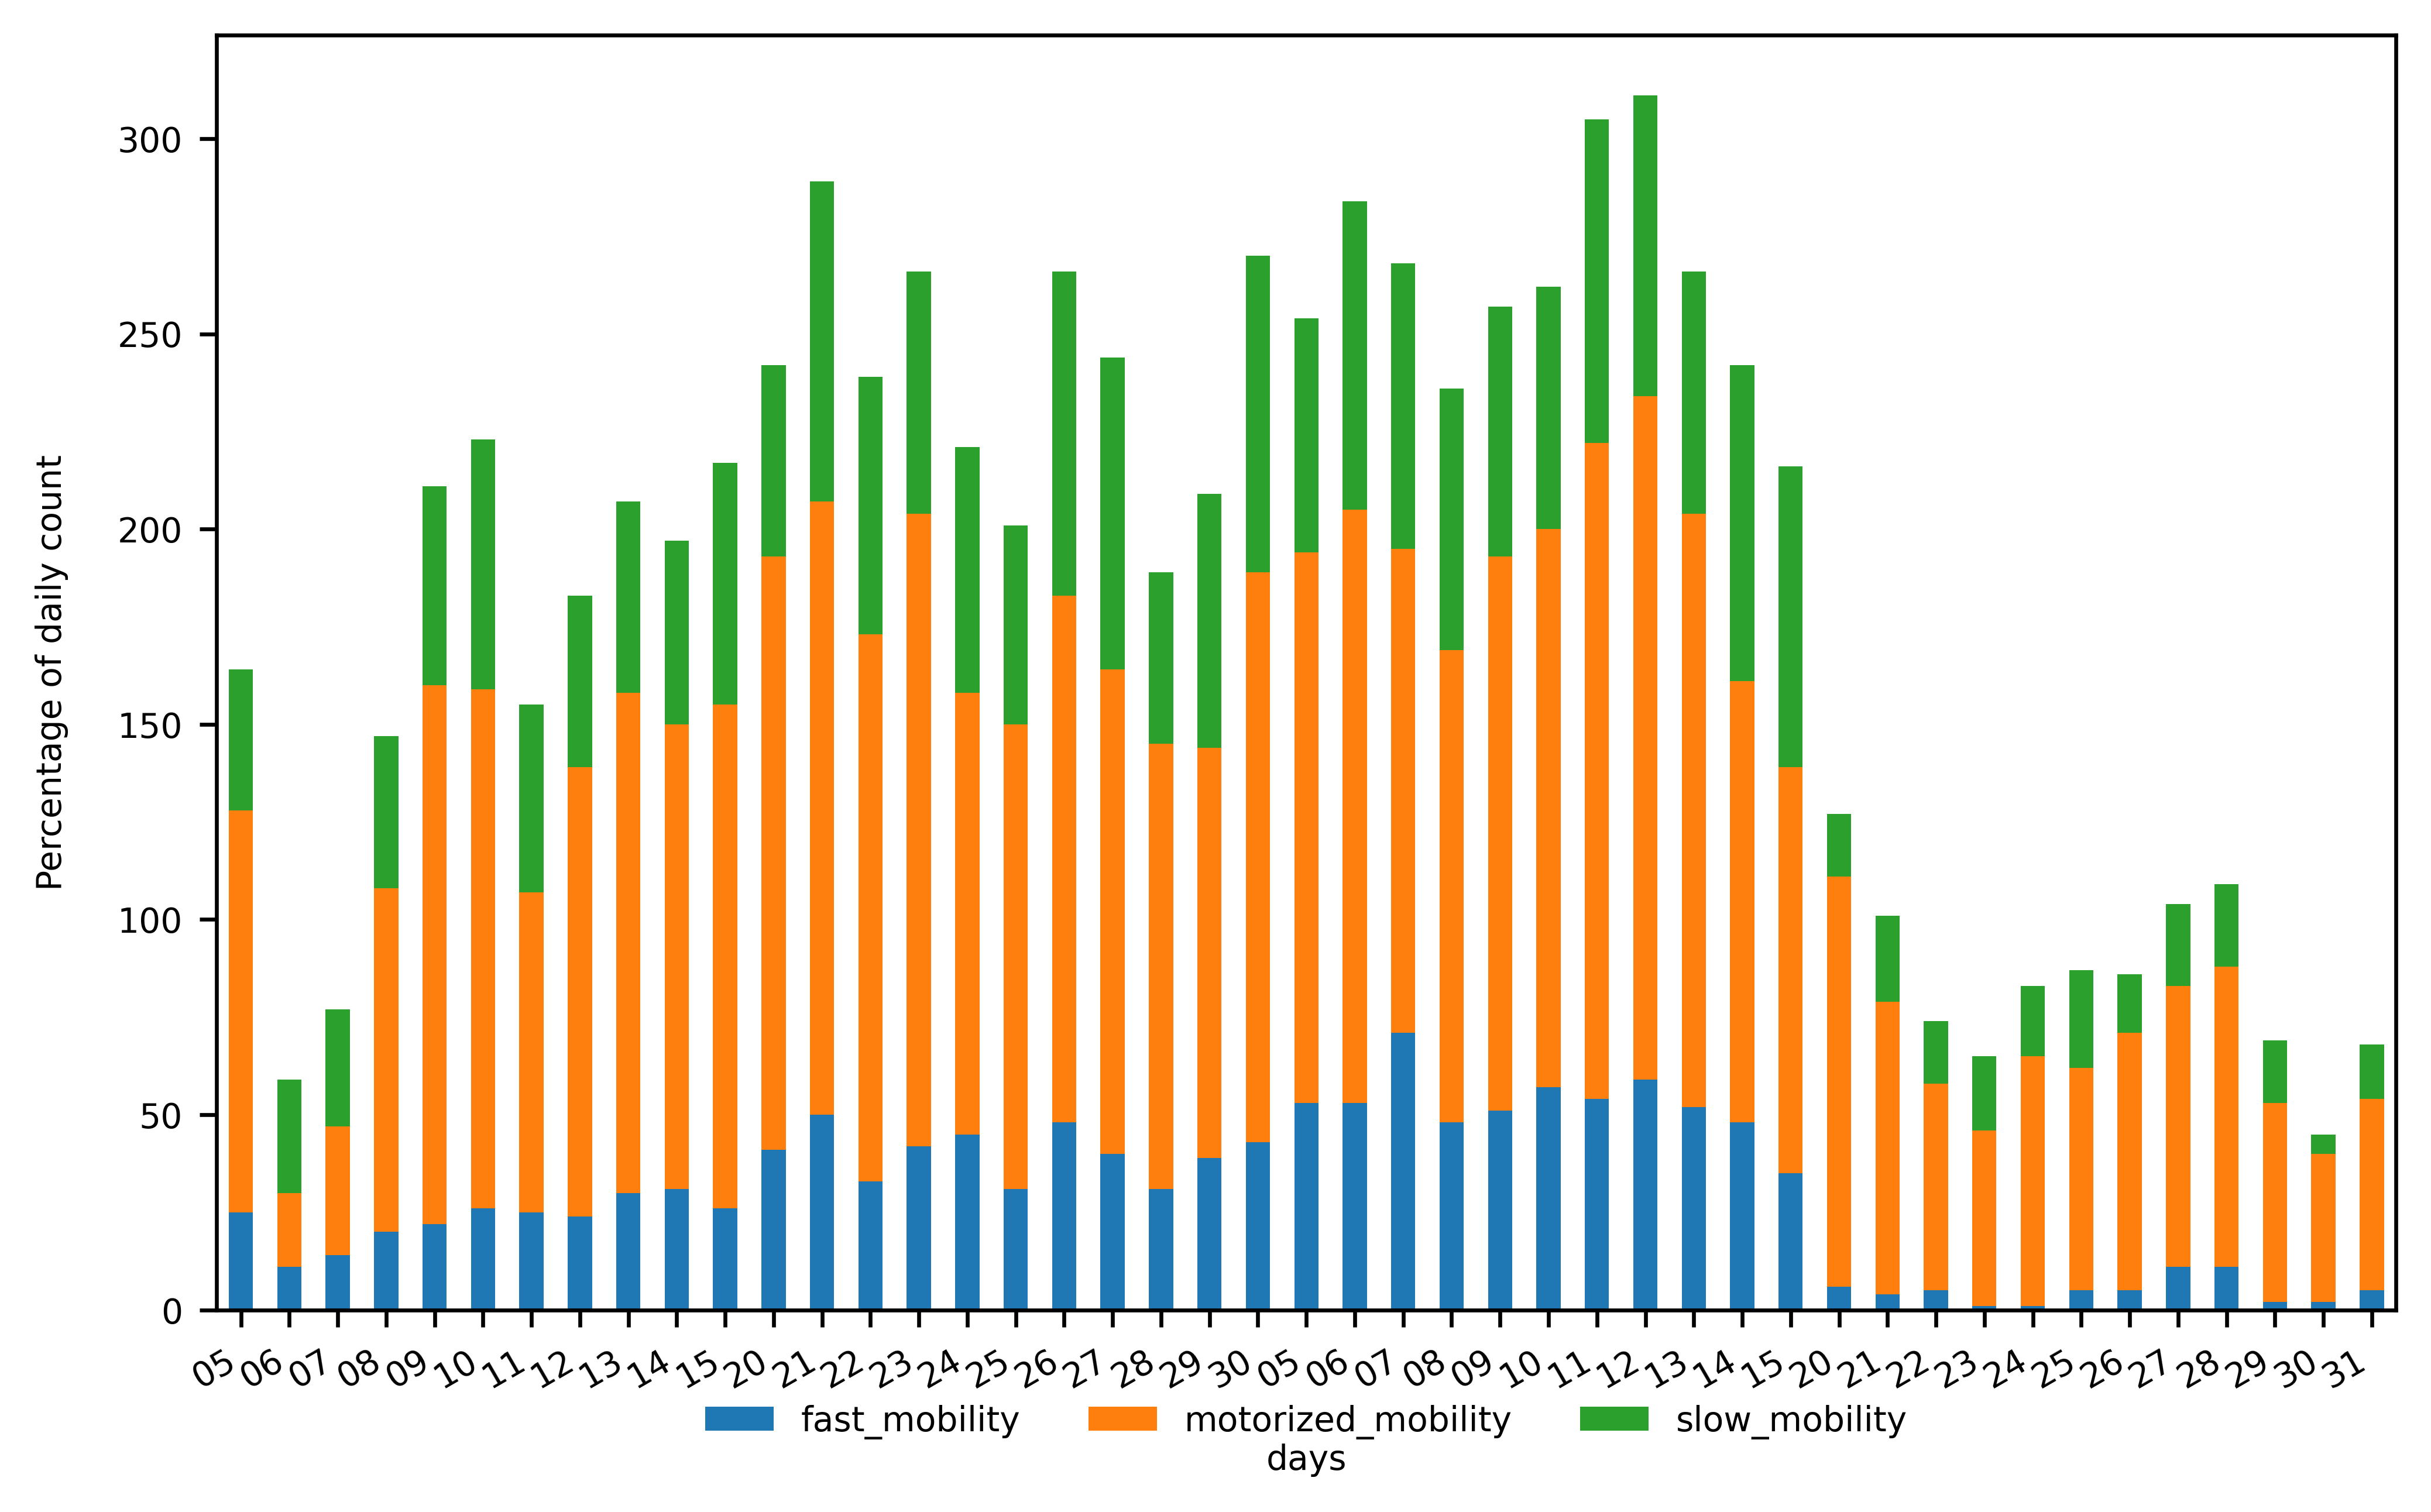

In [4]:
ti.visualization.modal_split.plot_modal_split(mode_split, date_fmt_x_axis='%d',
                 y_label='Percentage of daily count', x_label='days')

In [5]:
mode_split_user = ti.analysis.modal_split.calculate_modal_split(tpls = mode_tpls, freq='d', metric='count', per_user=True)

In [6]:
mode_split_user

mode                               fast_mobility  motorized_mobility  \
user_id timestamp                                                      
4       2022-09-05 00:00:00-04:00              0                   1   
        2022-09-06 00:00:00-04:00              0                   1   
        2022-09-08 00:00:00-04:00              0                   1   
        2022-09-09 00:00:00-04:00              0                   2   
        2022-09-12 00:00:00-04:00              0                   2   
...                                          ...                 ...   
12284   2022-10-24 00:00:00-04:00              0                   1   
12311   2022-10-31 00:00:00-04:00              0                   2   
12366   2022-10-28 00:00:00-04:00              0                   1   
12368   2022-10-24 00:00:00-04:00              0                   1   
12411   2022-10-26 00:00:00-04:00              1                   0   

mode                               slow_mobility  
user_id timestamp                                 
4       2022-09-05 00:00:00-04:00              0  
        2022-09-06 00:00:00-04:00              0  
        2022-09-08 00:00:00-04:00              0  
        2022-09-09 00:00:00-04:00              0  
        2022-09-12 00:00:00-04:00              0  
...                                          ...  
12284   2022-10-24 00:00:00-04:00              0  
12311   2022-10-31 00:00:00-04:00              0  
12366   2022-10-28 00:00:00-04:00              0  
12368   2022-10-24 00:00:00-04:00              0  
12411   2022-10-26 00:00:00-04:00              0  

[4160 rows x 3 columns]